In [29]:
# Task 1: Structured Dataset Acquisition and Structural Verification
# Objective
# To systematically acquire heterogeneous datasets and perform an initial structural assessment to
# understand data composition, attribute types, and integrity constraints.
import seaborn as sns
import pandas as pd
import numpy as np

iris=sns.load_dataset("iris")
tips=sns.load_dataset("tips")
titanic=sns.load_dataset("titanic")
print("1-First ten lines of each dataset\n\n",iris.head(),"\n\n",tips.head(),"\n\n",titanic.head())
print("\n\n2-Last ten lines of each dataset\n\n","\n\n",iris.tail(),"\n\n",tips.tail(),"\n\n",titanic.tail())
print("\n\n3-Iris => ",iris.shape,"\ntips => ",tips.shape,"\ntitanic => ",titanic.shape)
print("\n\n4-attributes:\nIris => ",iris.columns,"\ntips => ",tips.columns,"\nTitanic => ",titanic.columns)
print("\n\n5-info:\nIris => ",iris.info(),"\ntips => ",tips.info(),"\nTitanic => ",titanic.info())


1-First ten lines of each dataset

    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa 

    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  f

In [33]:
# Task 2: Attribute Role Identification and Data Typology Classification
# Objective
# To formally classify dataset attributes according to their computational role within an analytical
# pipeline.

titanic=sns.load_dataset("titanic")
df=pd.DataFrame(titanic)
df.targe

AttributeError: 'DataFrame' object has no attribute 'target'

In [65]:
# Task 3: Missing Data Quantification and Deterministic Imputation Strategy
# (Titanic Dataset)
# Objective
# To quantify missing data and apply a deterministic preprocessing strategy to restore dataset
# usability.

titanic=sns.load_dataset("titanic")
df=pd.DataFrame(titanic)
df.head()

print("Age before => \n",df["age"])
df["age"] = df ["age"].fillna(df["age"].mean())
print("\nAge after => \n",df["age"])

print("\n\nEmbarked before => \n",df["embarked"])
df["embarked"] = df ["embarked"].fillna(df["embarked"].mode())
print("Age after => \n",df["embarked"])

df=df.drop(columns="deck") 
print("dataframe after droping deck => ",df.head())

Age before => 
 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

Age after => 
 0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64


Embarked before => 
 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object
Age after => 
 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: object
dataframe after =>     survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2

In [110]:
# Task 4: Redundancy Detection and Duplicate Record Elimination
# Objective
# To enhance data integrity by identifying and removing redundant observations.

import seaborn as sns
import pandas as pd
import numpy as np


tips=sns.load_dataset("tips")
print("dimensions before tips => ",tips.shape)
print("Duplicate enteries => ", tips.duplicated().sum())
tips=tips.drop_duplicates()
print("dimensions after tips => ",tips.shape)

iris=sns.load_dataset("iris")
print("dimensions before iris => ",iris.shape)
print("Duplicate enteries => ", iris.duplicated().sum())
iris=iris.drop_duplicates()
print("dimensions afteriris  => ",iris.shape)

titanic=sns.load_dataset("titanic")
print("dimensions before titanic => ",titanic.shape)
print("Duplicate enteries => ", titanic.duplicated().sum())
titanic=titanic.drop_duplicates()
print("dimensions after => ",titanic.shape)


dimensions before tips =>  (244, 7)
Duplicate enteries =>  1
dimensions after tips =>  (243, 7)
dimensions before iris =>  (150, 5)
Duplicate enteries =>  1
dimensions afteriris  =>  (149, 5)
dimensions before titanic =>  (891, 15)
Duplicate enteries =>  107
dimensions after =>  (784, 15)


In [95]:
# Task 5: Descriptive Statistical Characterization of Features
# Objective
# To computationally summarize numerical features and analyze group-level statistical behavior.
iris=sns.load_dataset("iris")
print("1-Iris Dataset\n\n",iris.groupby("species").mean())
print("\n\n2-Titanics Dataset\n\n",titanic.groupby("survived")[["age","fare"]].mean())
print("\n\n3-Tips Dataset(mean)\n\n",tips[["total_bill","tip"]].mean())
print("\n\n3-Tips Dataset(median)\n\n",tips[["total_bill","tip"]].median())


1-Iris Dataset

             sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


2-Titanics Dataset

                 age       fare
survived                      
0         30.626179  22.117887
1         28.343690  48.395408


3-Tips Dataset(mean)

 total_bill    19.813868
tip            3.002387
dtype: float64


3-Tips Dataset(median)

 total_bill    17.81
tip            2.92
dtype: float64


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>]], dtype=object)

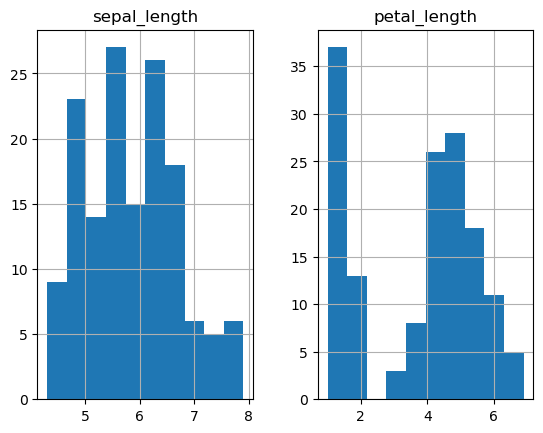

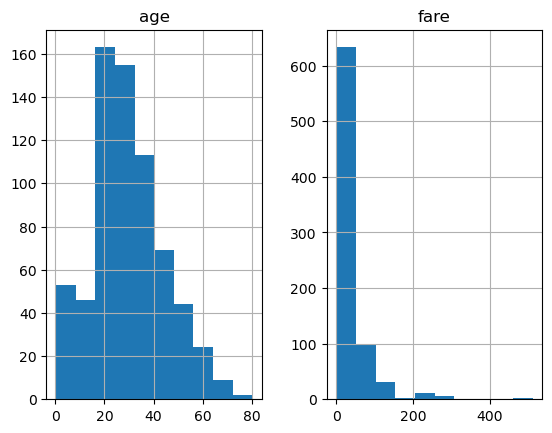

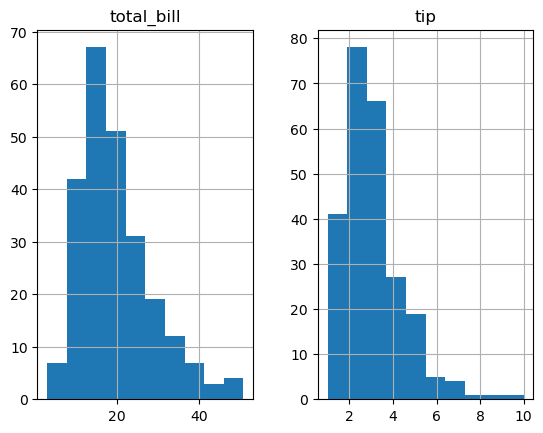

In [114]:
# Task 6: Distributional Analysis through Univariate Visualization
# Objective
# To analyze feature distributions and variability through graphical representations.

iris[["sepal_length","petal_length"]].hist()
titanic[["age","fare"]].hist()
tips[["total_bill","tip"]].hist()


Lower Bounds:
 total_bill   -2.82250
tip          -0.34375
dtype: float64

Upper Bounds:
 total_bill    40.29750
tip            5.90625
dtype: float64

Number of outliers per column:
total_bill    9
tip           9
dtype: int64


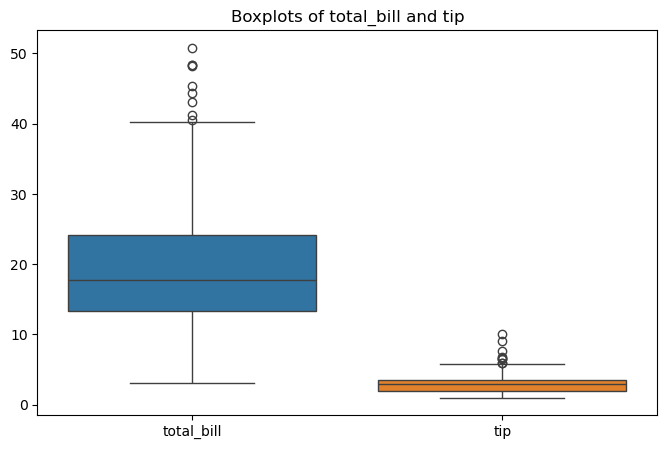

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
tips = sns.load_dataset("tips")

# Select columns
data = tips[["total_bill", "tip"]]

# Compute Q1, Q3, and IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("Lower Bounds:\n", lower)
print("\nUpper Bounds:\n", upper)

# Identify outliers
outliers = (data < lower) | (data > upper)

# Count outliers per column
outlier_counts = outliers.sum()

print("\nNumber of outliers per column:")
print(outlier_counts)

# Boxplots
plt.figure(figsize=(8,5))
sns.boxplot(data=data)
plt.title("Boxplots of total_bill and tip")
plt.show()


In [ ]:
# Task 8
import seaborn as sns
import matplotlib.pyplot as plt


tips = sns.load_dataset("tips")


before_rows = tips.shape[0]
print("Dataset size before outlier removal:", before_rows)


data = tips[["total_bill", "tip"]]


Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR


tips_cleaned = tips[
    (tips["total_bill"] >= lower["total_bill"]) & (tips["total_bill"] <= upper["total_bill"]) &
    (tips["tip"] >= lower["tip"]) & (tips["tip"] <= upper["tip"])
]


after_rows = tips_cleaned.shape[0]
print("Dataset size after outlier removal:", after_rows)

print("Number of rows removed:", before_rows - after_rows)


sns.boxplot(data=tips_cleaned[["total_bill", "tip"]])
plt.title("Boxplot after Outlier Removal")
plt.show()
